<a href="https://githubtocolab.com/Joanri20/mss_energy_project/blob/trunk/01_Proyecto_DataSet_World_Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# **DataSet World Energy Consumption**


## Exploración y limpieza del DataSet
Para continuar se debe realizar el cargue manual del dataset en el space del google coolab.
Luego de tener el dataset cargado se debe correr las siguientes lineas para eliminar columnas y filas que no se requieren.


In [193]:
# Cargue del archivo y de las librerias
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
from progressbar import progressbar as pbar
from local.lib import mlutils
%matplotlib inline
from zipfile import ZipFile
from scipy import stats
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import utils
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, ShuffleSplit

api_token = {"username":"dairorivas", "key":"80065b87e180c7be458b1d77f728b607"}
!rm -rf /root/.kaggle.
!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d pralabhpoudel/world-energy-consumption
archivo_zip = '/content/world-energy-consumption.zip'
d = pd.read_csv(archivo_zip)
d.head()


mkdir: cannot create directory ‘/root/.kaggle’: File exists
world-energy-consumption.zip: Skipping, found more recently modified local copy (use --force to force download)


,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Se seleccionan las columnas y los años de interes.

In [194]:
# Selección y filtrado de data de interes
columns = [
    'country', 'year', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'gas_prod_change_twh', 'oil_prod_change_twh', 'energy_cons_change_twh', 'coal_production',
       'coal_prod_per_capita','energy_cons_change_pct', 'electricity_generation', 'hydro_electricity', 'nuclear_electricity',
    'other_renewable_electricity', 'renewables_electricity','solar_electricity', 'wind_electricity', 'energy_per_gdp',
    'energy_per_capita','gas_production','gas_prod_per_capita', 'oil_production', 'oil_prod_per_capita','population', 'primary_energy_consumption',
    'gdp', 'hydro_share_elec', 'low_carbon_share_elec','low_carbon_electricity', 'low_carbon_elec_per_capita',
    'low_carbon_share_energy', 'low_carbon_energy_per_capita','other_renewables_elec_per_capita', 'other_renewables_share_elec', 'other_renewables_share_energy',
    'other_renewables_cons_change_twh', 'other_renewables_energy_per_capita','per_capita_electricity','renewables_elec_per_capita',
    'renewables_share_elec', 'renewables_cons_change_pct',
    'renewables_share_energy', 'renewables_cons_change_twh',
    'renewables_consumption', 'renewables_energy_per_capita',
    'solar_share_elec', 'solar_cons_change_pct',
    'solar_share_energy'
]


datasetColumnas= d[columns]

ds_filtrado = datasetColumnas[(datasetColumnas['year'] >= 1998) & (datasetColumnas['year'] <= 2020)]



#### Conversión Categoricas

In [195]:
# Conversión de columnas numericas a categoricas

columnsCategoricas = [
    'hydro_share_elec', 'low_carbon_share_elec', 'low_carbon_share_energy',
    'other_renewables_share_elec','other_renewables_share_energy', 'renewables_share_elec',
    'renewables_share_energy', 'solar_share_elec', 'solar_share_energy'
]
for column in columnsCategoricas:
    max_value = ds_filtrado[column].max()
    threshold1 = max_value / 3
    threshold2 = 2 * threshold1

    conditions = [
        (ds_filtrado[column] <= threshold1),
        (ds_filtrado[column] > threshold1) & (ds_filtrado[column] <= threshold2),
        (ds_filtrado[column] > threshold2)
    ]

    categories = ['bajo', 'medio', 'alto']
    random_categories = np.random.choice(categories, size=len(ds_filtrado))
    ds_filtrado[column + '_cat'] = np.select(conditions, categories, default=random_categories)
    #ds_filtrado[column + '_cat'] = np.select(conditions, categories, default="N/A")
    #ds_filtrado[column + '_cat'] = np.select(conditions, categories)
#Se elimina las originales y se dejan las convertidas en categoricas

for column in columnsCategoricas:
    # Elimina la columna original
    ds_filtrado = ds_filtrado.drop(column, axis=1)

    # Renombra la columna categórica para que tenga el nombre original
    ds_filtrado = ds_filtrado.rename(columns={column + '_cat': column})

print(ds_filtrado.shape)
d=ds_filtrado
d

(5328, 48)


<ipython-input-195-508590ff25ca>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_filtrado[column + '_cat'] = np.select(conditions, categories, default=random_categories)
<ipython-input-195-508590ff25ca>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_filtrado[column + '_cat'] = np.select(conditions, categories, default=random_categories)
<ipython-input-195-508590ff25ca>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_twh,oil_prod_change_twh,energy_cons_change_twh,coal_production,coal_prod_per_capita,energy_cons_change_pct,...,solar_cons_change_pct,hydro_share_elec,low_carbon_share_elec,low_carbon_share_energy,other_renewables_share_elec,other_renewables_share_energy,renewables_share_elec,renewables_share_energy,solar_share_elec,solar_share_energy
98,Afghanistan,1998,0.000,0.000,NaN,NaN,-0.181,0.012,0.589,-2.669,...,NaN,medio,bajo,bajo,medio,medio,alto,medio,alto,bajo
99,Afghanistan,1999,-50.000,-0.006,NaN,NaN,-0.006,0.006,0.288,-0.093,...,NaN,alto,medio,bajo,bajo,medio,alto,medio,medio,alto
100,Afghanistan,2000,0.000,0.000,NaN,NaN,-0.835,0.006,0.279,-12.633,...,NaN,alto,alto,alto,bajo,bajo,alto,alto,bajo,bajo
101,Afghanistan,2001,2498.993,0.145,NaN,NaN,-1.295,0.151,6.986,-22.419,...,NaN,alto,alto,medio,bajo,bajo,alto,alto,bajo,medio
102,Afghanistan,2002,-19.231,-0.029,NaN,NaN,-0.220,0.122,5.394,-4.909,...,NaN,alto,alto,medio,bajo,bajo,alto,bajo,bajo,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,-0.443,32.517,2353.763,-0.789,...,NaN,medio,medio,bajo,bajo,alto,medio,medio,bajo,bajo
17428,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,-8.142,20.260,1444.068,-14.633,...,NaN,medio,medio,medio,bajo,alto,medio,bajo,bajo,bajo
17429,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,21.957,1542.260,NaN,...,NaN,medio,medio,alto,bajo,medio,medio,bajo,bajo,bajo
17430,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,26.910,1863.676,NaN,...,NaN,medio,medio,alto,bajo,bajo,medio,alto,bajo,medio


**IMPORTANTE:** Crear Copia de la data

In [202]:
kdf= d[d.columns].copy()

### Se valida el tipo de cada columna

In [203]:
for c in kdf.columns:
    print ("%20s"%c, kdf[c].dtype)

             country object
                year int64
coal_prod_change_pct float64
coal_prod_change_twh float64
 gas_prod_change_twh float64
 oil_prod_change_twh float64
energy_cons_change_twh float64
     coal_production float64
coal_prod_per_capita float64
energy_cons_change_pct float64
electricity_generation float64
   hydro_electricity float64
 nuclear_electricity float64
other_renewable_electricity float64
renewables_electricity float64
   solar_electricity float64
    wind_electricity float64
      energy_per_gdp float64
   energy_per_capita float64
      gas_production float64
 gas_prod_per_capita float64
      oil_production float64
 oil_prod_per_capita float64
          population float64
primary_energy_consumption float64
                 gdp float64
low_carbon_electricity float64
low_carbon_elec_per_capita float64
low_carbon_energy_per_capita float64
other_renewables_elec_per_capita float64
other_renewables_cons_change_twh float64
other_renewables_energy_per_capita float64


### Limpieza de data

#### Visión general de los datos faltantes

Variables con datos faltantes coal_prod_change_pct                  3476
coal_prod_change_twh                  2343
gas_prod_change_twh                   3401
oil_prod_change_twh                   3422
energy_cons_change_twh                 531
coal_production                       2339
coal_prod_per_capita                  2597
energy_cons_change_pct                 550
electricity_generation                 481
hydro_electricity                      481
nuclear_electricity                    481
other_renewable_electricity            503
renewables_electricity                 503
solar_electricity                      481
wind_electricity                       481
energy_per_gdp                        2166
energy_per_capita                      983
gas_production                        3398
gas_prod_per_capita                   3602
oil_production                        3415
oil_prod_per_capita                   3619
population                             580
primary_energy_consumpti

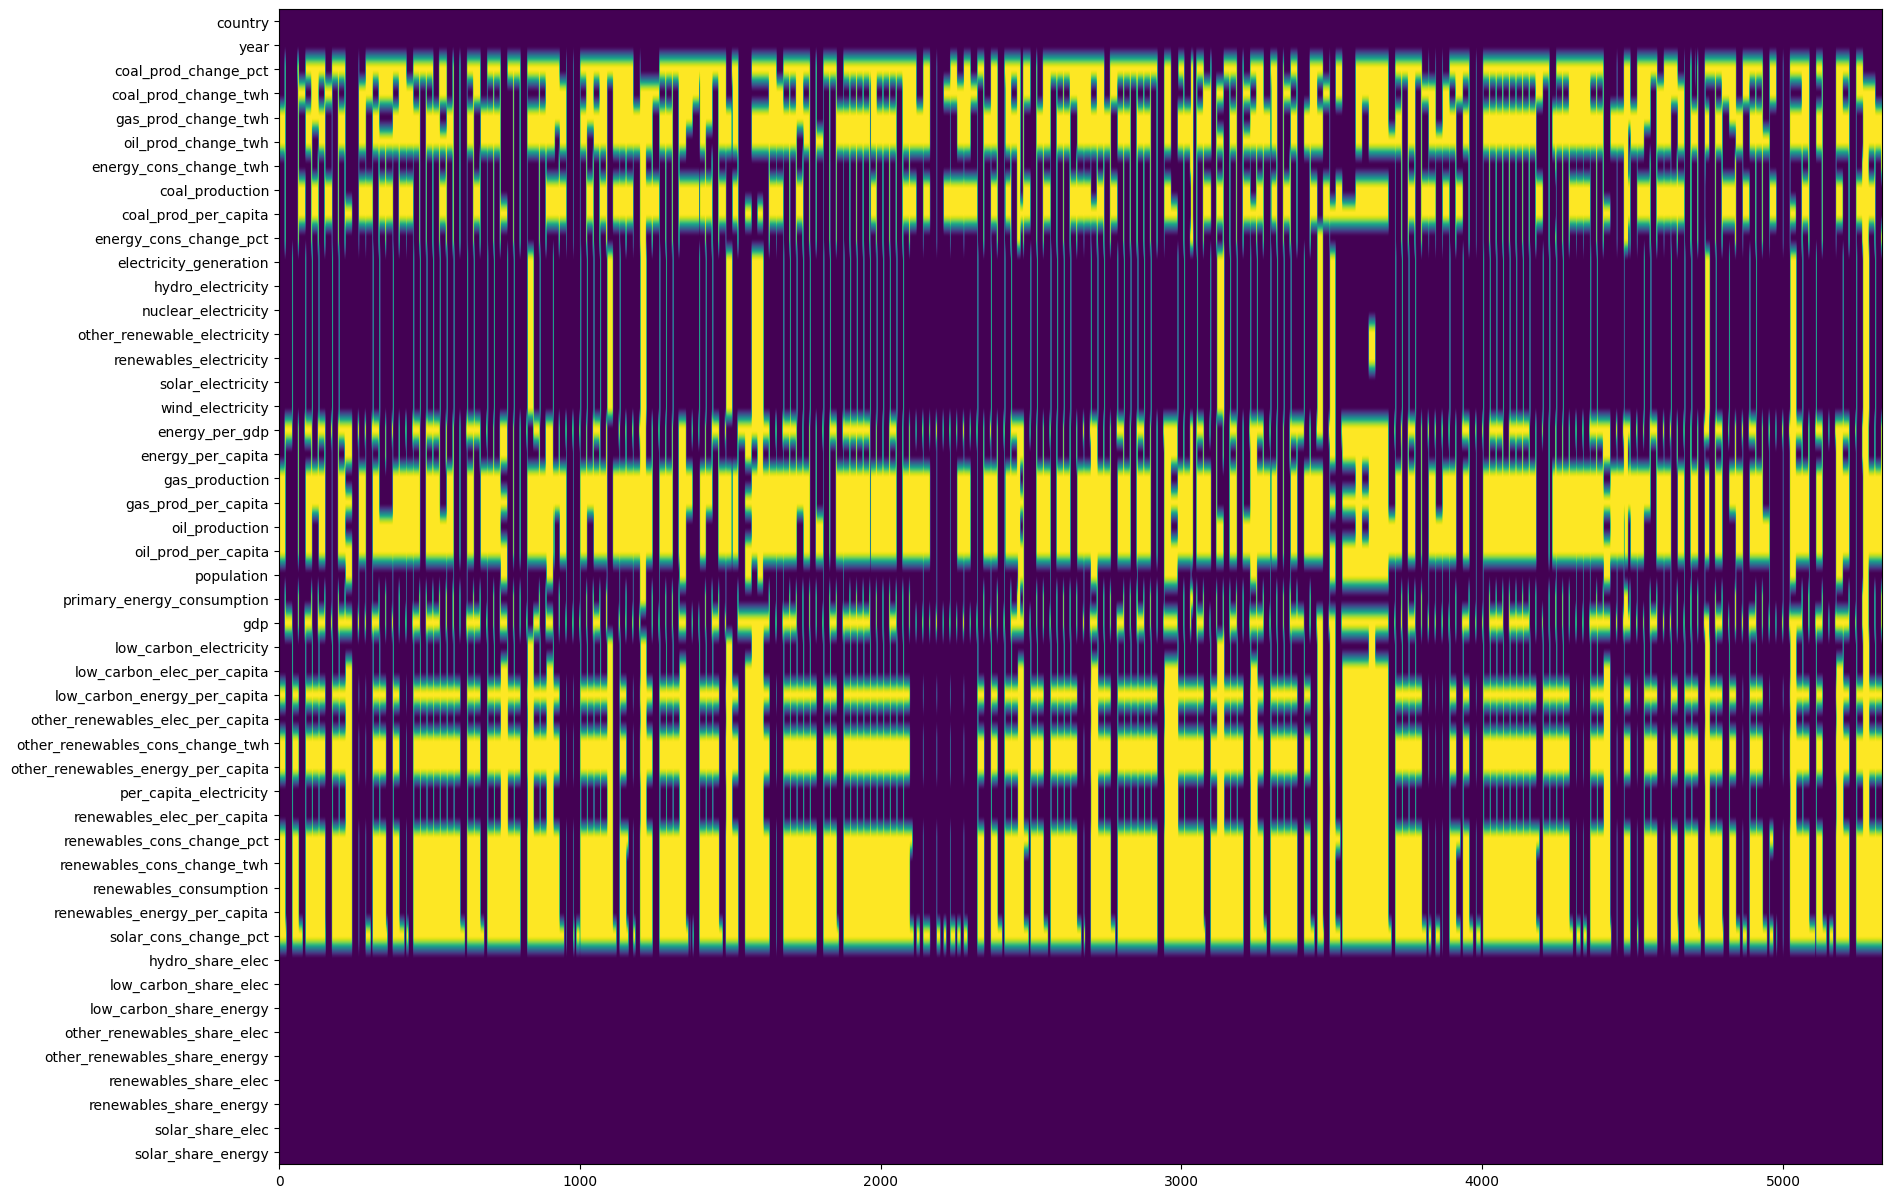

In [204]:
k = kdf.isna().sum()
print("Variables con datos faltantes", k[k!=0])
print("Variables sin datos faltantes", k[k==0])
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(kdf.isna().values.T)
ax.set_aspect(80)
plt.yticks(range(kdf.shape[1]), d.columns);

Revisión porcentaje de data faltante

In [205]:

missing_data = kdf[kdf.columns].isnull().sum()
print("Missing Data")
print(missing_data)

print()
print("-----------------------------")
print()
missing_percentage = (kdf[kdf.columns].isna().sum() / len(kdf)) * 100
columns_with_missing_values = missing_percentage[missing_percentage >0 ]
print("Percentage of missing data per column:")
print(columns_with_missing_values)

Missing Data
country                                  0
year                                     0
coal_prod_change_pct                  3476
coal_prod_change_twh                  2343
gas_prod_change_twh                   3401
oil_prod_change_twh                   3422
energy_cons_change_twh                 531
coal_production                       2339
coal_prod_per_capita                  2597
energy_cons_change_pct                 550
electricity_generation                 481
hydro_electricity                      481
nuclear_electricity                    481
other_renewable_electricity            503
renewables_electricity                 503
solar_electricity                      481
wind_electricity                       481
energy_per_gdp                        2166
energy_per_capita                      983
gas_production                        3398
gas_prod_per_capita                   3602
oil_production                        3415
oil_prod_per_capita                   361

#### Se elimina las columnas con alta cantidad de datos faltantes
Se eliminaran las columnas con el 60 % de datos faltantes

In [206]:
criterio = len(kdf) * 0.4 #criterio para eliminar la columnas (El 40 % de estas)
kdf.dropna(axis=1, thresh = criterio, inplace = True)  #eliminación de las columnas con más de 60% de datos faltantes
print('Cantidad de datos y columnas: ',kdf.shape)
kdf.columns

Cantidad de datos y columnas:  (5328, 33)


Index(['country', 'year', 'coal_prod_change_twh', 'energy_cons_change_twh',
       'coal_production', 'coal_prod_per_capita', 'energy_cons_change_pct',
       'electricity_generation', 'hydro_electricity', 'nuclear_electricity',
       'other_renewable_electricity', 'renewables_electricity',
       'solar_electricity', 'wind_electricity', 'energy_per_gdp',
       'energy_per_capita', 'population', 'primary_energy_consumption', 'gdp',
       'low_carbon_electricity', 'low_carbon_elec_per_capita',
       'other_renewables_elec_per_capita', 'per_capita_electricity',
       'renewables_elec_per_capita', 'hydro_share_elec',
       'low_carbon_share_elec', 'low_carbon_share_energy',
       'other_renewables_share_elec', 'other_renewables_share_energy',
       'renewables_share_elec', 'renewables_share_energy', 'solar_share_elec',
       'solar_share_energy'],
      dtype='object')

Se eliminan las variables ya que tenian más del 60% de datos faltates.

###Rellenar los datos faltantes
Ya se realizó el borrado de columnas que no cumplian con menos del 60% de datos, ahora relllenamos los datos faltantes, a los númericos con la media y a los categoricas con el valor más frecuente.

In [207]:
for col in kdf.columns:
        if kdf[col].dtype == 'object':  # Si la columna es categórica
            most_frequent = kdf[col].mode()[0]  # Encuentra el valor más frecuente
            kdf[col].fillna(most_frequent, inplace=True)  # Rellena los valores faltantes con el valor más frecuente
        else:  # Si la columna es numérica
            mean = kdf[col].mean()  # Calcula la media
            kdf[col].fillna(mean, inplace=True)  # Rellena los valores faltantes con la media
kdf

,country,year,coal_prod_change_twh,energy_cons_change_twh,coal_production,coal_prod_per_capita,energy_cons_change_pct,electricity_generation,hydro_electricity,nuclear_electricity,...,renewables_elec_per_capita,hydro_share_elec,low_carbon_share_elec,low_carbon_share_energy,other_renewables_share_elec,other_renewables_share_energy,renewables_share_elec,renewables_share_energy,solar_share_elec,solar_share_energy
98,Afghanistan,1998,0.000,-0.181000,0.012,0.589,-2.669000,285.484449,47.5588,36.469503,...,1123.859677,medio,bajo,bajo,medio,medio,alto,medio,alto,bajo
99,Afghanistan,1999,-0.006,-0.006000,0.006,0.288,-0.093000,285.484449,47.5588,36.469503,...,1123.859677,alto,medio,bajo,bajo,medio,alto,medio,medio,alto
100,Afghanistan,2000,0.000,-0.835000,0.006,0.279,-12.633000,0.467000,0.3120,0.000000,...,15.014000,alto,alto,alto,bajo,bajo,alto,alto,bajo,bajo
101,Afghanistan,2001,0.145,-1.295000,0.151,6.986,-22.419000,0.592000,0.4980,0.000000,...,23.048000,alto,alto,medio,bajo,bajo,alto,alto,bajo,medio
102,Afghanistan,2002,-0.029,-0.220000,0.122,5.394,-4.909000,0.687000,0.5550,0.000000,...,24.556000,alto,alto,medio,bajo,bajo,alto,bajo,bajo,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,Zimbabwe,2015,-10.847,-0.443000,32.517,2353.763,-0.789000,9.388000,4.9400,0.000000,...,367.427000,medio,medio,bajo,bajo,alto,medio,medio,bajo,bajo
17428,Zimbabwe,2016,-12.257,-8.142000,20.260,1444.068,-14.633000,6.826000,2.9550,0.000000,...,221.739000,medio,medio,medio,bajo,alto,medio,bajo,bajo,bajo
17429,Zimbabwe,2017,1.697,37.964762,21.957,1542.260,3.738849,7.310000,3.9290,0.000000,...,287.350000,medio,medio,alto,bajo,medio,medio,bajo,bajo,bajo
17430,Zimbabwe,2018,4.952,37.964762,26.910,1863.676,3.738849,9.133000,5.0000,0.000000,...,360.205000,medio,medio,alto,bajo,bajo,medio,alto,bajo,medio


### Validación nueva de visión general luego del borrado


Series([], dtype: int64)


country                             0
year                                0
coal_prod_change_twh                0
energy_cons_change_twh              0
coal_production                     0
coal_prod_per_capita                0
energy_cons_change_pct              0
electricity_generation              0
hydro_electricity                   0
nuclear_electricity                 0
other_renewable_electricity         0
renewables_electricity              0
solar_electricity                   0
wind_electricity                    0
energy_per_gdp                      0
energy_per_capita                   0
population                          0
primary_energy_consumption          0
gdp                                 0
low_carbon_electricity              0
low_carbon_elec_per_capita          0
other_renewables_elec_per_capita    0
per_capita_electricity              0
renewables_elec_per_capita          0
hydro_share_elec                    0
low_carbon_share_elec               0
low_carbon_s

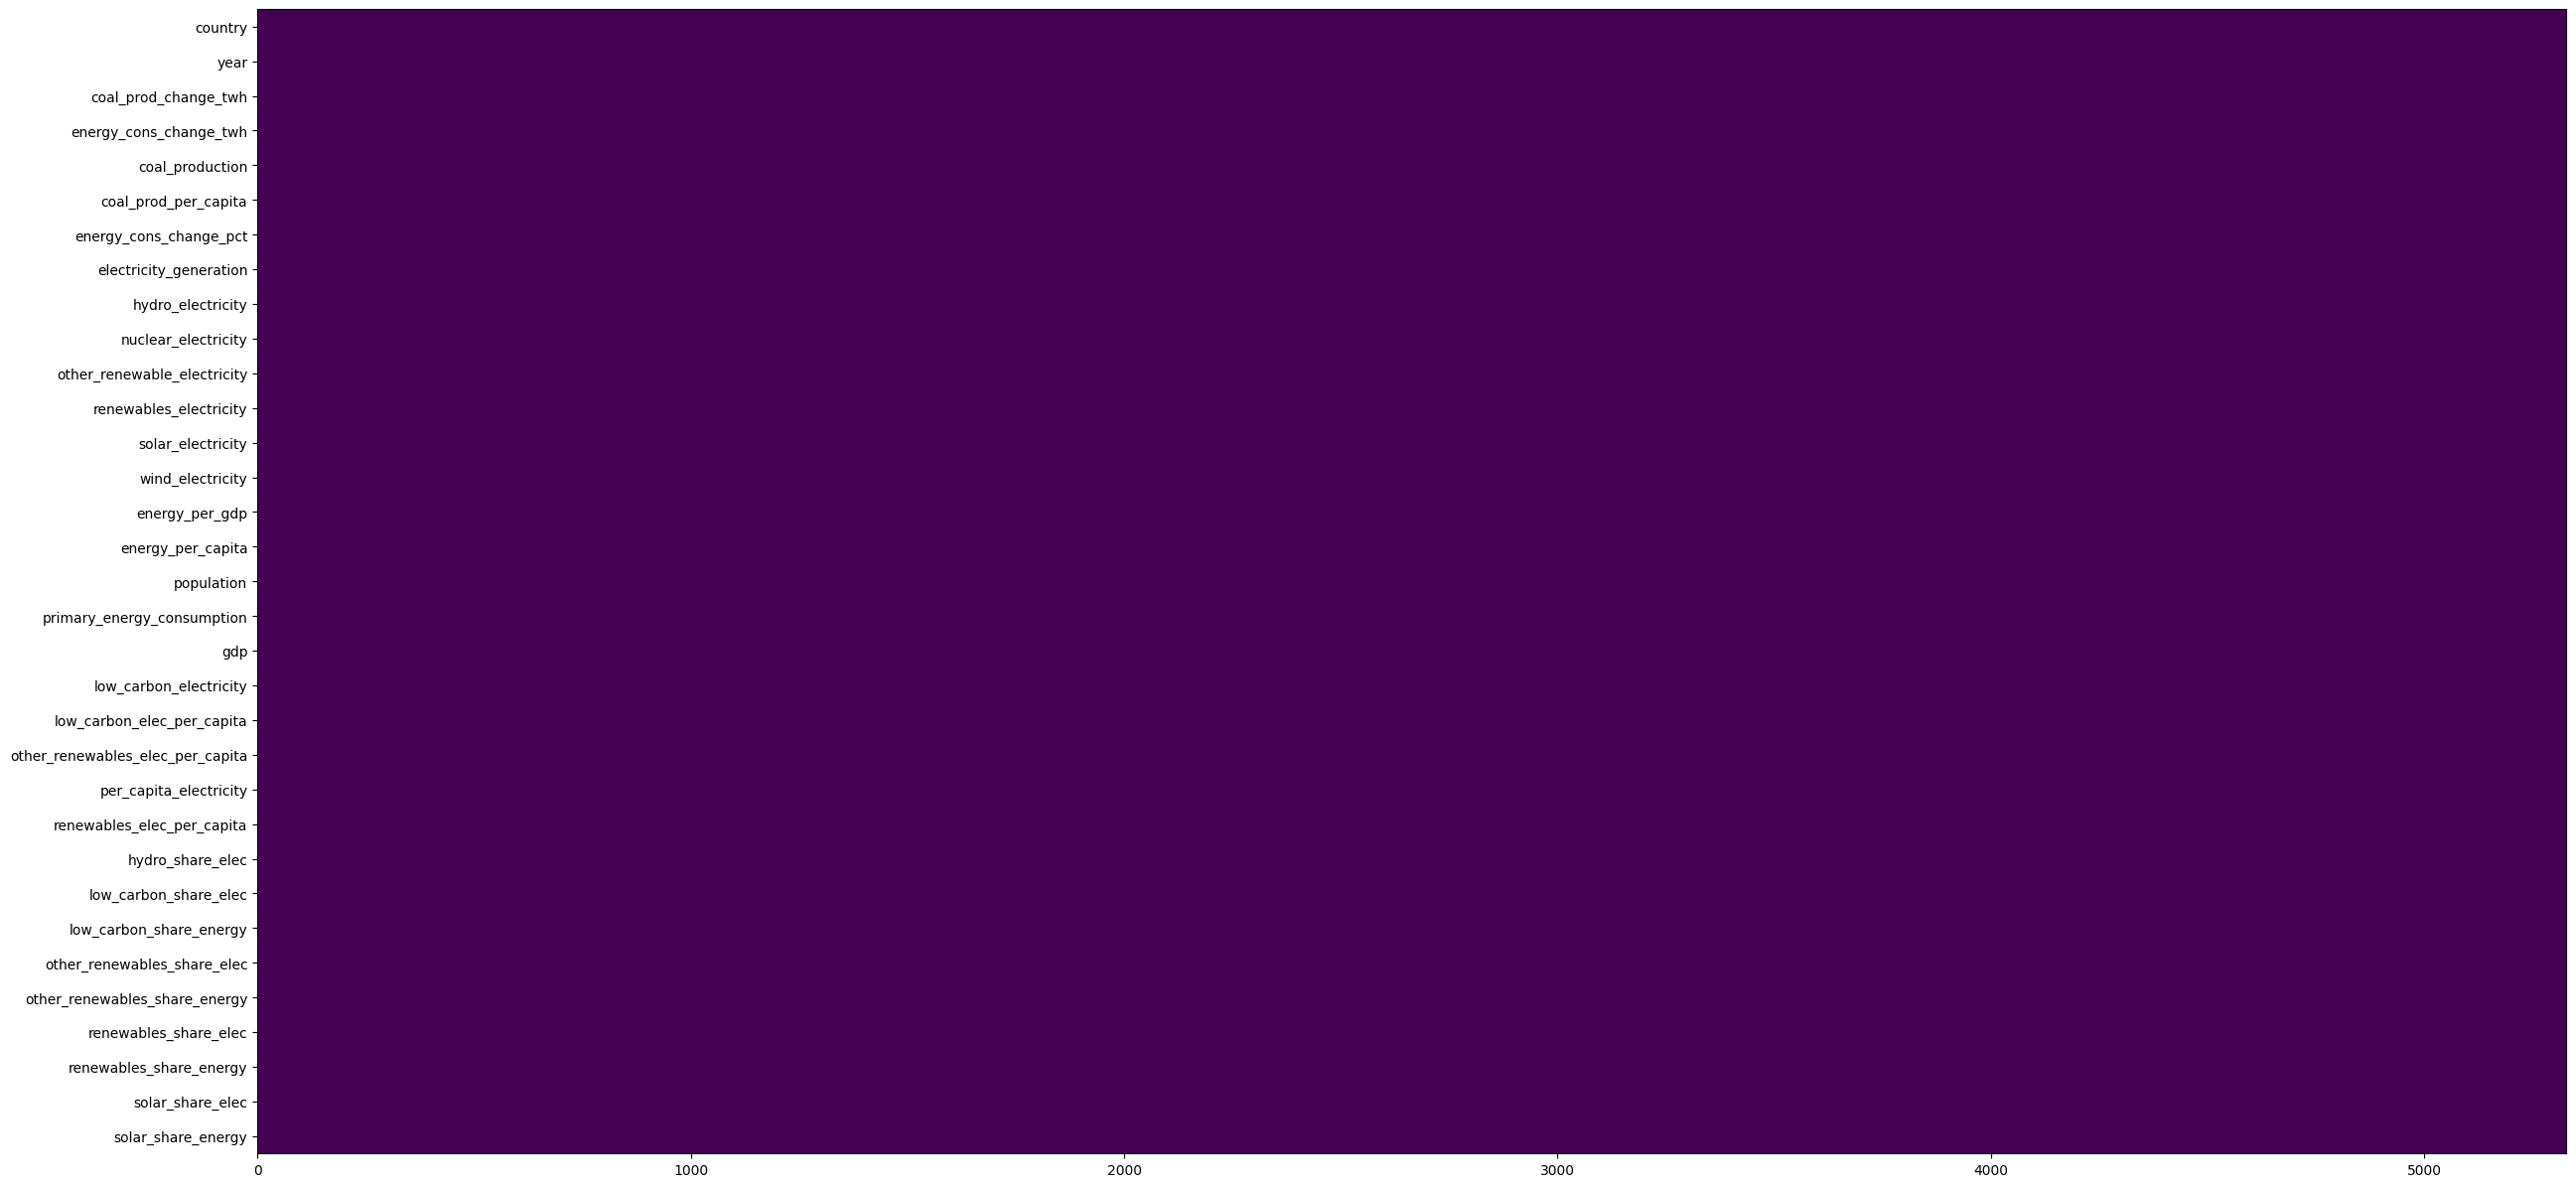

In [208]:
k = kdf.isna().sum()
print(k[k!=0])
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(kdf.isna().values.T)
ax.set_aspect(80)
plt.yticks(range(kdf.shape[1]), kdf.columns);
nulls=kdf.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        kdf[i].ffill(inplace=True)
        kdf[i].bfill(inplace=True)
kdf.isna().sum()

Seleccion de columnas con valores unicos menor a 10

In [209]:
for column in kdf.columns:
    print(column)
    unique_count = kdf[column].nunique()
    data_type = kdf[column].dtype
    print(f"Column: {column}, Unique Count: {unique_count}, Data Type: {data_type}")

# Initialize a list to store column names
preselected_columns = []

# Iterate through columns
for col in kdf.columns:
    # Check if the column is numeric or categorical with unique values less than 10
    if (pd.api.types.is_numeric_dtype(kdf[col]) or
        (pd.api.types.is_object_dtype(kdf[col]) and kdf[col].nunique() < 10)):
        preselected_columns.append(col)

# Display the result
print("Preselected Columns:")
print(preselected_columns)
print(len(preselected_columns))


for col in preselected_columns:
    if pd.api.types.is_object_dtype(kdf[col]):
        value_counts = kdf[col].value_counts()
        print(f'Column: {col}')
        print(value_counts)
        print('\n')

country
Column: country, Unique Count: 241, Data Type: object
year
Column: year, Unique Count: 23, Data Type: int64
coal_prod_change_twh
Column: coal_prod_change_twh, Unique Count: 1241, Data Type: float64
energy_cons_change_twh
Column: energy_cons_change_twh, Unique Count: 3836, Data Type: float64
coal_production
Column: coal_production, Unique Count: 1297, Data Type: float64
coal_prod_per_capita
Column: coal_prod_per_capita, Unique Count: 1148, Data Type: float64
energy_cons_change_pct
Column: energy_cons_change_pct, Unique Count: 4190, Data Type: float64
electricity_generation
Column: electricity_generation, Unique Count: 4078, Data Type: float64
hydro_electricity
Column: hydro_electricity, Unique Count: 2882, Data Type: float64
nuclear_electricity
Column: nuclear_electricity, Unique Count: 882, Data Type: float64
other_renewable_electricity
Column: other_renewable_electricity, Unique Count: 1524, Data Type: float64
renewables_electricity
Column: renewables_electricity, Unique Count

### Evaluación de la variable objetivo "renewables_elec_per_capita"
Consumo per cápita de energía primaria a partir de fuentes renovables (kilovatios-hora)

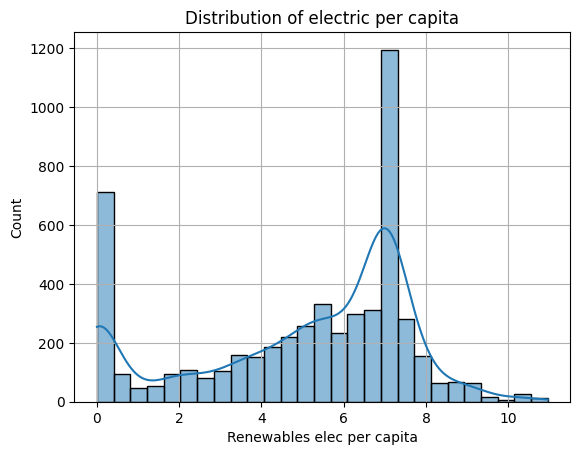

In [139]:
#transformación logaritmica de la variable objetivo ya que presenta una asimetria muy pronunciada hacia la izquierda.
kdf.loc[:,'renewables_elec_per_capita']=np.log1p(kdf['renewables_elec_per_capita'])
sns.histplot(kdf['renewables_elec_per_capita'], kde=True)
plt.title('Distribution of electric per capita')
plt.xlabel('Renewables elec per capita')
plt.grid()
plt.show()

### Se valida la correlacción entre varias columnas significativas

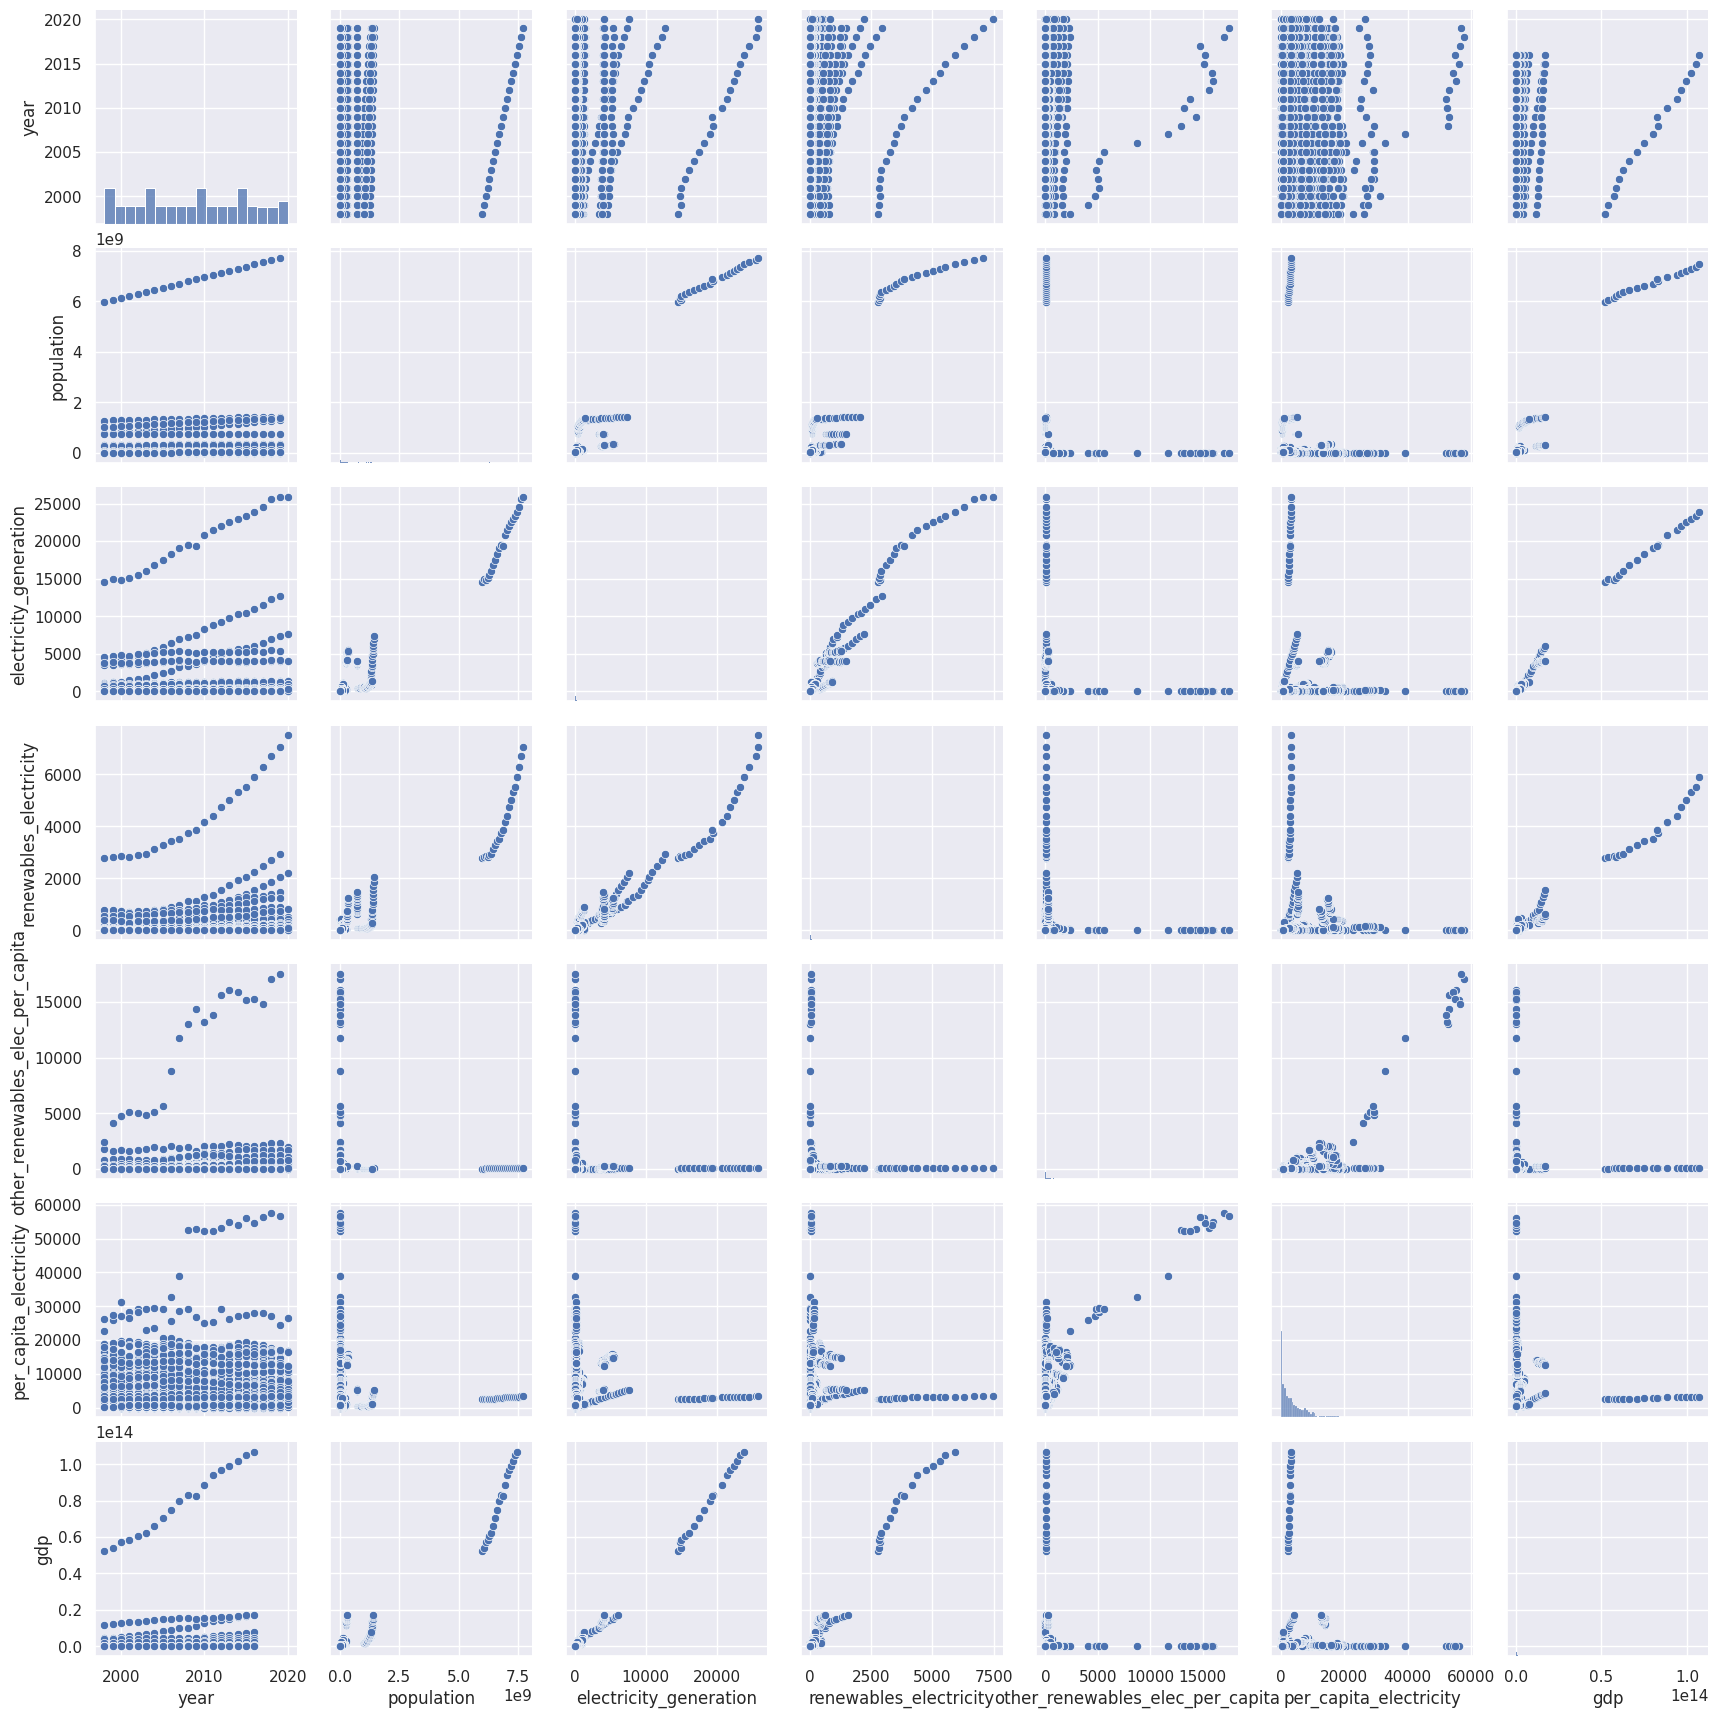

In [ ]:
cols = ['year', 'population', 'electricity_generation', 'renewables_electricity', 'other_renewables_elec_per_capita', 'per_capita_electricity', 'gdp']
sns.set()
sns.pairplot(d[cols])

### Matriz de correlación

<ipython-input-74-ef88f94f31dc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = kdf.corr()


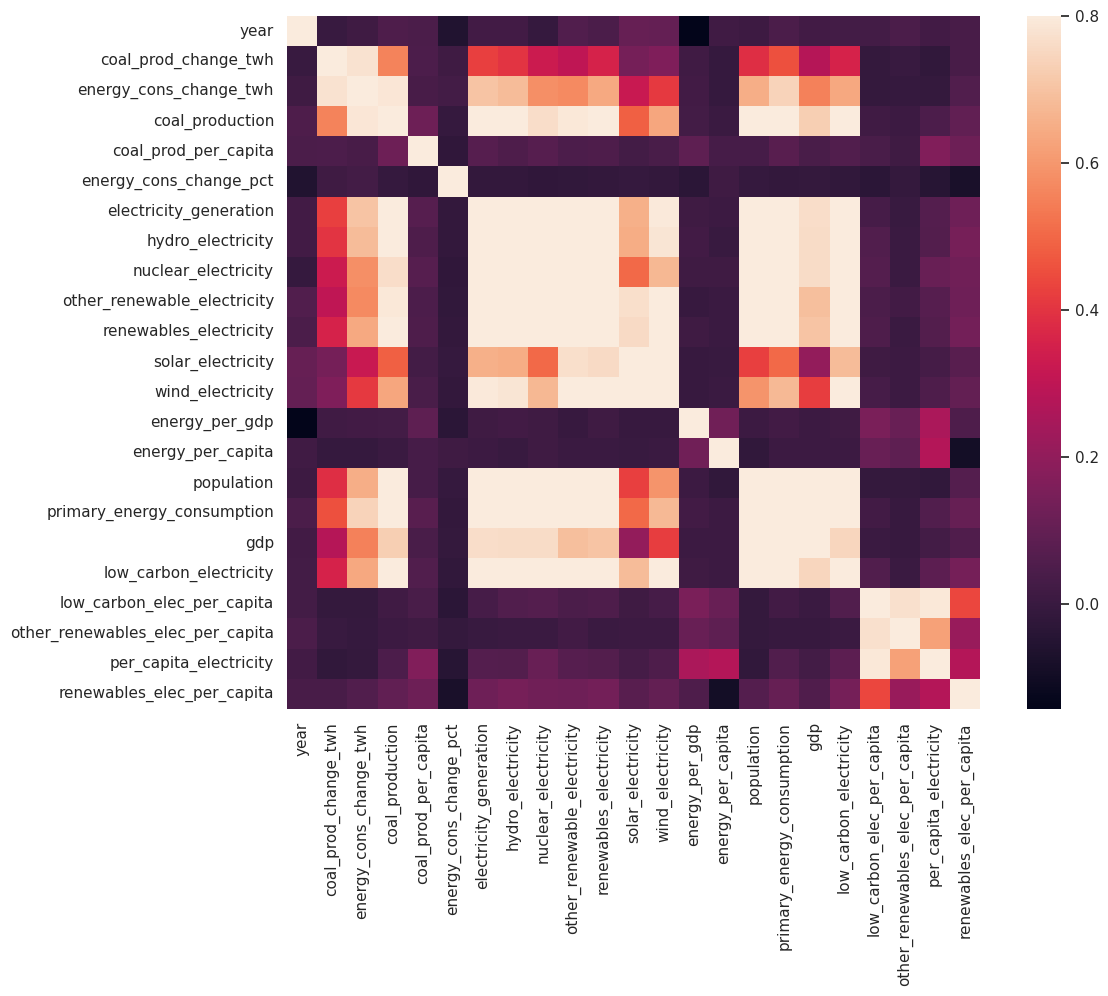

In [ ]:
corrmat = kdf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Relación entre la variable objetivo y las categoricas

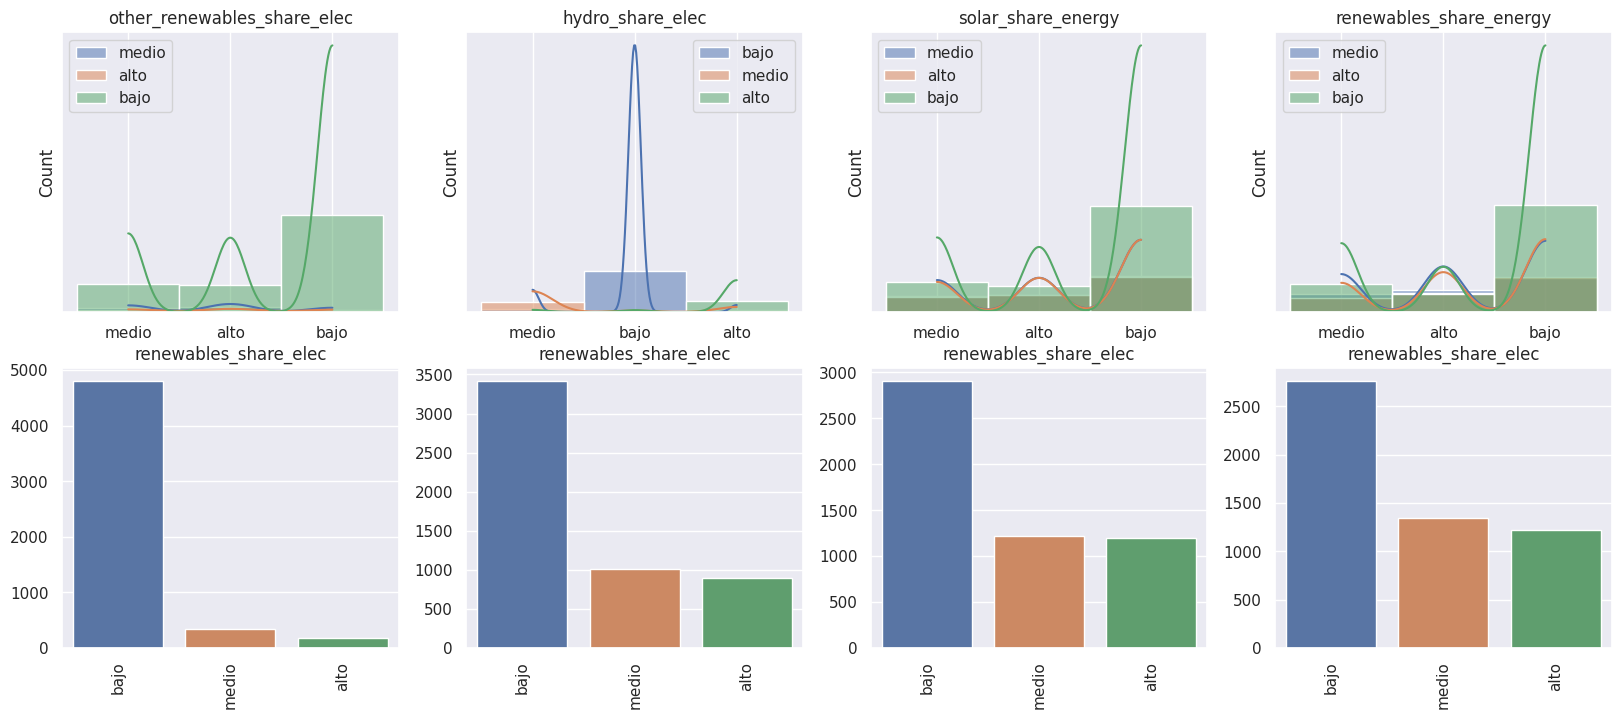

In [ ]:
plt.figure(figsize=(20, 8))
for i, c in enumerate(["other_renewables_share_elec", "hydro_share_elec", "solar_share_energy", "renewables_share_energy"]):
    plt.subplot(2, 4, i + 1)
    k = kdf[[c, "renewables_share_elec"]].dropna()
    unique_categories = kdf[c].dropna().unique()
    for v in unique_categories:
        sns.histplot(data=k[k[c] == v], x="renewables_share_elec", label=v, kde=True)
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(2, 4, i + 5)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")

plt.show()

Visualización variables categoricas y númericas

In [192]:
cate=[]
numeri=[]
for col in kdf.columns:
        if kdf[col].dtype == 'object':  # Si la columna es categórica
            cate.append(col)
        else:  # Si la columna es numérica
            numeri.append(col)
print("Categoricas")
print(cate)
print("numericas")
print(numeri)



Categoricas
['country', 'hydro_share_elec', 'low_carbon_share_elec', 'low_carbon_share_energy', 'other_renewables_share_elec', 'other_renewables_share_energy', 'renewables_share_elec', 'renewables_share_energy', 'solar_share_elec', 'solar_share_energy']
numericas
['low_carbon_elec_per_capita', 'other_renewables_elec_per_capita', 'per_capita_electricity', 'renewables_elec_per_capita']


In [ ]:
energy_by_city = kdf.groupby('country').agg(poblacion=('population','mean'), electricidad_generada=('electricity_generation', 'mean'), electricidad_per_capita=('per_capita_electricity', 'mean'), gdp=('gdp', 'mean'),renewables_elec_per_capita=('renewables_elec_per_capita', 'mean')).sort_values('renewables_elec_per_capita', ascending=False)
energy_by_city

,poblacion,electricidad_generada,electricidad_per_capita,gdp,renewables_elec_per_capita
country,,,,,
Iceland,3.092727e+05,13.580045,43047.345955,1.378779e+11,10.619102
Norway,7.819011e+06,131.616913,26980.597391,4.303092e+11,10.186789
Canada,3.531362e+07,608.045652,18042.391957,1.263657e+12,9.342906
Sweden,1.210797e+07,154.171348,16457.705522,4.655265e+11,9.091463
Paraguay,6.109091e+06,75.405404,8335.699389,1.604465e+11,8.892249
...,...,...,...,...,...
Gibraltar,3.318182e+04,26.098268,4672.875798,9.385276e+11,0.638674
Saudi Arabia,2.665023e+07,224.002455,8104.980045,9.042083e+11,0.489181
Turkmenistan,5.065727e+06,14.924273,2892.704818,1.777457e+11,0.488302


Las columnas numérica o categóricas con valores únicos menores que 20, para reducir la dimensionalidad de los datos y eliminar las columnas que no son relevantes o que tienen demasiadas categorías para el análisis

In [210]:
# Initialize a list to store column names
preselected_columns = []

# Iterate through columns
for col in kdf.columns:
    # Check if the column is numeric or categorical with unique values less than 20
    if (pd.api.types.is_numeric_dtype(kdf[col]) or
        (pd.api.types.is_object_dtype(kdf[col]) and kdf[col].nunique() < 20)):
        preselected_columns.append(col)

# Display the result
print("Preselected Columns:")
print(preselected_columns)
print(len(preselected_columns))

Preselected Columns:
['year', 'coal_prod_change_twh', 'energy_cons_change_twh', 'coal_production', 'coal_prod_per_capita', 'energy_cons_change_pct', 'electricity_generation', 'hydro_electricity', 'nuclear_electricity', 'other_renewable_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity', 'energy_per_gdp', 'energy_per_capita', 'population', 'primary_energy_consumption', 'gdp', 'low_carbon_electricity', 'low_carbon_elec_per_capita', 'other_renewables_elec_per_capita', 'per_capita_electricity', 'renewables_elec_per_capita', 'hydro_share_elec', 'low_carbon_share_elec', 'low_carbon_share_energy', 'other_renewables_share_elec', 'other_renewables_share_energy', 'renewables_share_elec', 'renewables_share_energy', 'solar_share_elec', 'solar_share_energy']
32


In [211]:
for col in preselected_columns:
    if pd.api.types.is_object_dtype(kdf[col]):
        value_counts = kdf[col].value_counts()
        print(f'Column: {col}')
        print(value_counts)
        print('\n')

Column: hydro_share_elec
bajo     3397
medio    1006
alto      925
Name: hydro_share_elec, dtype: int64


Column: low_carbon_share_elec
bajo     2794
medio    1315
alto     1219
Name: low_carbon_share_elec, dtype: int64


Column: low_carbon_share_energy
bajo     2702
medio    1387
alto     1239
Name: low_carbon_share_energy, dtype: int64


Column: other_renewables_share_elec
bajo     4799
medio     317
alto      212
Name: other_renewables_share_elec, dtype: int64


Column: other_renewables_share_energy
bajo     2946
medio    1256
alto     1126
Name: other_renewables_share_energy, dtype: int64


Column: renewables_share_elec
bajo     3183
medio    1085
alto     1060
Name: renewables_share_elec, dtype: int64


Column: renewables_share_energy
bajo     2814
medio    1336
alto     1178
Name: renewables_share_energy, dtype: int64


Column: solar_share_elec
bajo     4949
alto      190
medio     189
Name: solar_share_elec, dtype: int64


Column: solar_share_energy
bajo     2965
medio    1182
a

Se excluyen variables categoricas en la selección de columnas

In [212]:
columns_to_exclude = []
selected_columns = [col for col in preselected_columns if col not in columns_to_exclude]

# Display the resulting list
print("Selected Columns:")
print(selected_columns)

Selected Columns:
['year', 'coal_prod_change_twh', 'energy_cons_change_twh', 'coal_production', 'coal_prod_per_capita', 'energy_cons_change_pct', 'electricity_generation', 'hydro_electricity', 'nuclear_electricity', 'other_renewable_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity', 'energy_per_gdp', 'energy_per_capita', 'population', 'primary_energy_consumption', 'gdp', 'low_carbon_electricity', 'low_carbon_elec_per_capita', 'other_renewables_elec_per_capita', 'per_capita_electricity', 'renewables_elec_per_capita', 'hydro_share_elec', 'low_carbon_share_elec', 'low_carbon_share_energy', 'other_renewables_share_elec', 'other_renewables_share_energy', 'renewables_share_elec', 'renewables_share_energy', 'solar_share_elec', 'solar_share_energy']


## Métodos Supervisados: Generación del Modelo

### Crear Metrica

In [213]:
# Función para reportar el error del modelo
def report_cv_score(z):

    # MSLE en prueba y entrenamiento
    lr_ts_score = z['test_score']*(-1)
    lr_tr_score = z['train_score']*(-1)
    lin_msle_ts = lr_ts_score
    lin_msle_tr = lr_tr_score
    print("MSLE Test: ", "{:.5f}".format(np.mean(lin_msle_ts)), "(±", "{:.8f}".format(np.std(lin_msle_ts)),")")
    print("MSLE Train: ", "{:.5f}".format(np.mean(lin_msle_tr)), "(±", "{:.8f}".format(np.std(lin_msle_tr)),")")

In [214]:
# Función para calcular el MSLE de los modelos implementados
def MSLE(y_actual, y_pred):
    return mean_squared_log_error(y_actual, y_pred)

Eliminación variables con menos correlación

In [215]:
def drop_low_corr_columns(df, target, threshold):
    # Calcula el valor absoluto de las correlaciones de Pearson con la columna objetivo
    correlations = df.corr()[target].abs()

    # Encuentra las columnas con una correlación menor que el umbral
    low_corr_columns = correlations[correlations < threshold].index

    # Elimina estas columnas del DataFrame
    df = df.drop(low_corr_columns, axis=1)

    return df



In [216]:
kdf=drop_low_corr_columns(kdf,'renewables_elec_per_capita',0.3)

<ipython-input-215-8c82390a1a0c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()[target].abs()


Transformación de variables categoricas en dummy

In [219]:
def create_dummy_df(df, cat_cols, dummy_na):
    for col in  cat_cols:
        try:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [233]:
columnsCategoricas.extend(['country'])
ddf = create_dummy_df(kdf, columnsCategoricas, dummy_na=False)
ddf.head(20)

,low_carbon_elec_per_capita,other_renewables_elec_per_capita,per_capita_electricity,renewables_elec_per_capita,hydro_share_elec_bajo,hydro_share_elec_medio,low_carbon_share_elec_bajo,low_carbon_share_elec_medio,low_carbon_share_energy_bajo,low_carbon_share_energy_medio,...,country_Vanuatu,country_Venezuela,country_Vietnam,country_Western Africa,country_Western Sahara,country_World,country_Yemen,country_Yugoslavia,country_Zambia,country_Zimbabwe
98,1449.328962,128.837135,3818.477274,1123.859677,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
99,1449.328962,128.837135,3818.477274,1123.859677,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
100,15.014000,0.000000,22.474000,15.014000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,23.048000,0.000000,27.399000,23.048000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
102,24.556000,0.000000,30.397000,24.556000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103,26.604000,0.000000,39.652000,26.604000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,22.850000,0.000000,36.155000,22.850000,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
105,22.998000,0.000000,36.408000,22.998000,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
106,24.099000,0.000000,31.665000,24.099000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
107,27.600000,0.000000,34.906000,27.600000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split data



In [228]:
# Separa 20% de la data para entrenamiento
ddf_train, ddf_holdout = train_test_split(ddf, test_size=0.2, random_state=42)
ddf_train_copy = ddf_train.copy()
print(ddf_holdout.shape)

(1066, 262)


In [229]:
# Preparar los datos de entrenamiento y prueba.
X = ddf_train_copy.drop(columns = ['renewables_elec_per_capita']).copy()
y = ddf_train_copy['renewables_elec_per_capita']

In [230]:
test = len(ddf_holdout) / len(ddf_train_copy)
train = 1-(test)

# split train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train)

print(X_test.shape,X_train.shape, X.shape)

(1066, 261) (3196, 261) (4262, 261)


###Primer iteración

####Entrenar y evaluar el modelo de regresión lineal

In [236]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

y_test_preds = reg_lin.predict(X_test)
y_train_preds = reg_lin.predict(X_train)

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print('test_score:', test_score,  'train_score:', train_score)
regression_mae = round(mean_absolute_error(y_test, y_test_preds))
print("Regresión Lineal MAE:", regression_mae)

test_score: 0.9985065048996883 train_score: 0.9976464957083427
Regresión Lineal MAE: 69


In [235]:
ddf_reg_lin = pd.DataFrame({'Actual': y_test, 'Predicho': y_test_preds})
ddf_reg_lin.sample(3).round(2)

,Actual,Predicho
16444,68.95,76.16
16229,161.50,535.42
10375,1123.86,1031.03


In [79]:
def coef_weights(coefficients, X_train):
    coefs_ddf = pd.DataFrame()
    coefs_ddf['est_int'] = X_train.columns
    coefs_ddf['coefs'] = coefficients
    coefs_ddf['abs_coefs'] = np.abs(coefficients)
    coefs_ddf = coefs_ddf.sort_values('abs_coefs', ascending=False)
    return coefs_ddf

coef_df = coef_weights(reg_lin.coef_, X_train)
coef_df.head(30)

,est_int,coefs,abs_coefs
97,country_Iceland,-6.376492,6.376492
232,country_Venezuela,4.116543,4.116543
27,country_Brazil,4.020798,4.020798
175,country_Portugal,3.959840,3.959840
56,country_Denmark,3.952155,3.952155
12,country_Austria,3.945464,3.945464
115,country_Latvia,3.889484,3.889484
50,country_Croatia,3.886593,3.886593
42,country_Chile,3.791346,3.791346
148,country_New Zealand,3.713909,3.713909


In [80]:
dist_from_coef = coef_df[coef_df["est_int"].str.startswith('dist_from_')]
dist_from_coef

,est_int,coefs,abs_coefs


####Entrenamiento y evalúo el modelo de Decision Tree Model

In [234]:
dctree = DecisionTreeRegressor(max_depth=5)
dctree.fit(X_train, y_train)

pred_dctree_test = dctree.predict(X_test)
pred_dctree_train = dctree.predict(X_train)

df_dctree = pd.DataFrame({'Actual': y_test, 'Predicho': pred_dctree_test})

#Score using your model
test_score = r2_score(y_test, pred_dctree_test)
train_score = r2_score(y_train, pred_dctree_train)

print('test_score:', test_score,  'train_score:', train_score)

# Calcular el MAE del modelo de Decision Tree
decision_tree_mae = round(mean_absolute_error(y_test, pred_dctree_test), 4)
print("Decision Tree MAE:", decision_tree_mae)

test_score: 0.9932310115603774 train_score: 0.9906460085225298
Decision Tree MAE: 169.8379


In [ ]:
df_dctree.sample(3).round(2)

,Actual,Predicho
13625,189.09,182.94
14905,9061.27,8732.81
16675,3017.76,2432.19


####Entrenamiento y evalúo el modelo de Support Vector Machine

In [ ]:
svm = SVR(gamma=1)
svm.fit(X_train, y_train)

pred_svm_test = svm.predict(X_test)
pred_svm_train = svm.predict(X_train)

df_svm = pd.DataFrame({'Actual': y_test, 'Predicho': pred_svm_test})

test_score = r2_score(y_test, pred_svm_test)
train_score = r2_score(y_train, pred_svm_train)

print('test_score:', test_score,  'train_score:', train_score)
svm_mae = round(mean_absolute_error(y_test, pred_svm_test), 4)
print("SVM MAE:", svm_mae)

test_score: -0.07043251516066751 train_score: -0.04786723043555585
SVM MAE: 964.1223


In [ ]:
df_svm.sample(3).round(2)

,Actual,Predicho
5766,0.00,313.21
4203,883.68,313.21
6532,7089.29,313.21


####Entrenamiento y evalúo el modelo de Random Forest Model


In [ ]:

rf_model = RandomForestRegressor(max_depth=5)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_pred)
train_score = r2_score(y_train, y_train_pred)

print('test_score:', test_score,  'train_score:', train_score)

# Evaluate the model on the test set using MAE
test_mae = round(mean_absolute_error(y_test, y_test_pred), 4)

print(f'Test Random Forest Model MAE: {test_mae}')

test_score: 0.985567700259888 train_score: 0.9950227205518579
Test Random Forest Model MAE: 137.9011


In [ ]:
df_random_forest = pd.DataFrame({'Actual': y_test, 'Predicho': y_test_pred})
df_random_forest.sample(3).round(2)

,Actual,Predicho
5044,10.19,17.89
16227,163.77,1113.20
6881,60.59,17.89


### **Segunda Iteracion: (Bootstrapping)**

In [ ]:
def report_cv_score(z):
    print ("test score   %.3f (±%.4f) with %d splits"%(np.mean(z["test_score"]), np.std(z["test_score"]), len(z["test_score"])))
    print ("train score  %.3f (±%.4f) with %d splits"%(np.mean(z["train_score"]), np.std(z["train_score"]), len(z["train_score"])))

def calculate_mae(estimator, X, y):
    preds = estimator.predict(X)
    mae = mean_absolute_error(y, preds)
    return mae

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplo Entrenamiento")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="test score")

    plt.legend(loc="best")

#### Modelo 1: Decision Tree Model

In [ ]:
estimador1 = DecisionTreeRegressor(max_depth=10)
z1 = cross_validate(estimador1, X, y, return_train_score=True, return_estimator=True,
                    scoring=calculate_mae, cv=ShuffleSplit(n_splits=10, test_size=test))
report_cv_score(z1)

test score   69.386 (±9.4442) with 10 splits
train score  32.868 (±3.9562) with 10 splits


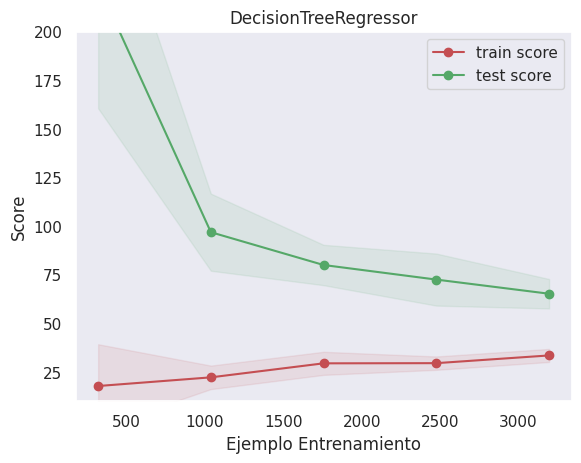

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=test)
plot_learning_curve(estimador1, estimador1.__class__.__name__, X, y, cv=cv, scoring=calculate_mae, ylim=(10,200))

#### Model 2: SVR

In [ ]:
estimador2 = SVR(gamma='scale')
z2 = cross_validate(estimador2, X, y, return_train_score=True, return_estimator=True,
                    scoring=calculate_mae, cv=ShuffleSplit(n_splits=10, test_size= test))
report_cv_score(z2)

test score   921.357 (±67.3630) with 10 splits
train score  1003.211 (±24.5377) with 10 splits


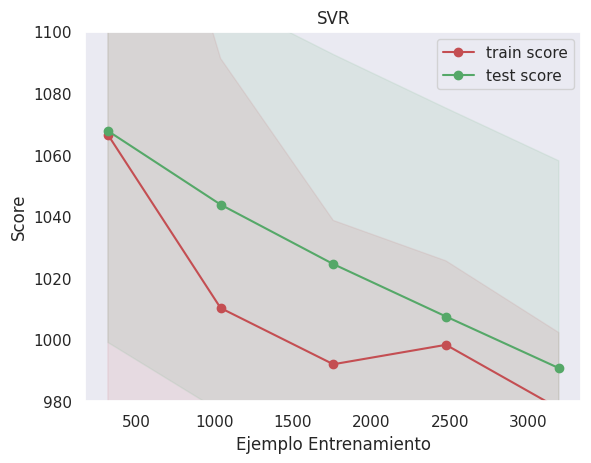

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=test)
plot_learning_curve(estimador2, estimador2.__class__.__name__, X, y, cv=cv, scoring=calculate_mae, ylim=(980,1100))

#### Model 3: Regresión Lineal

In [ ]:
estimador3 = LinearRegression()
z3 = cross_validate(estimador3, X, y, return_train_score=True, return_estimator=True,
                    scoring=calculate_mae, cv=ShuffleSplit(n_splits=10, test_size= test))
report_cv_score(z3)

test score   71.065 (±3.9557) with 10 splits
train score  63.623 (±2.7810) with 10 splits


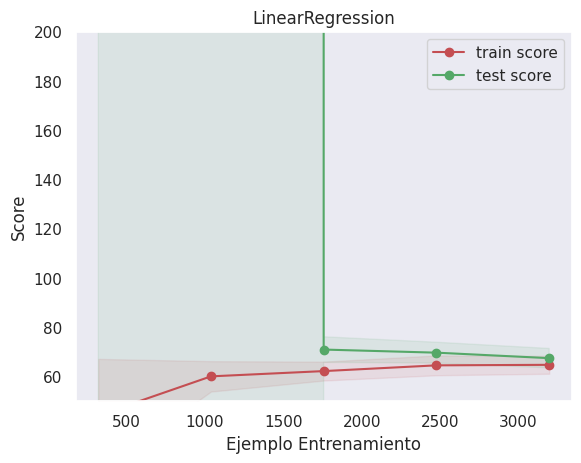

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=test)
plot_learning_curve(estimador3, estimador3.__class__.__name__, X, y, cv=cv, scoring=calculate_mae, ylim=(50,200))

#### Modelo 4: Random Forest Regressor

In [ ]:
estimador4 = RandomForestRegressor(max_depth=10)
z4 = cross_validate(estimador4, X, y, return_train_score=True, return_estimator=True,
                    scoring=calculate_mae, cv=ShuffleSplit(n_splits=10, test_size= test))
report_cv_score(z4)

test score   53.385 (±5.3016) with 10 splits
train score  33.297 (±0.9049) with 10 splits


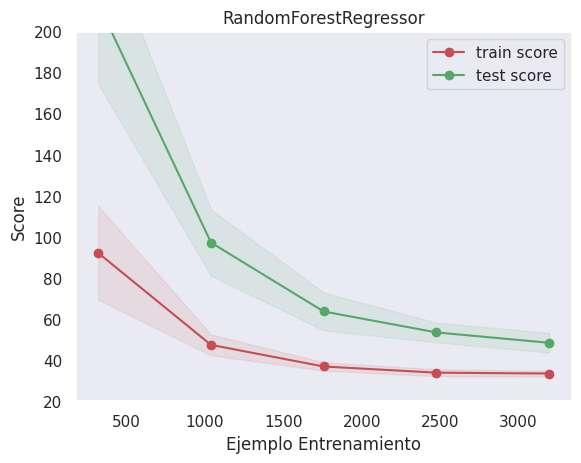

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=test)
plot_learning_curve(estimador4, estimador4.__class__.__name__, X, y, cv=cv, scoring=calculate_mae, ylim=(20,200))

#### Automatización del proceso de selección de modelos

In [ ]:
tscores = []
estimators = [estimador1, estimador2,estimador3,estimador4]
for estimator in estimators:
    print("-------------------------------")
    z = cross_validate(estimator, X, y, return_train_score=True, return_estimator=False,
                       scoring=calculate_mae, cv=ShuffleSplit(n_splits=10, test_size=test))
    report_cv_score(z)
    tscores.append(np.mean(z["test_score"]))
best = np.argmin(tscores)
print ("selecting ", best)
best_estimator = estimators[best]
print ("Modelo seleccionado")
print (best_estimator)

-------------------------------
test score   63.837 (±8.2469) with 10 splits
train score  33.974 (±3.6897) with 10 splits
-------------------------------
test score   1036.578 (±118.4872) with 10 splits
train score  960.124 (±43.4635) with 10 splits
-------------------------------
test score   71.358 (±4.1042) with 10 splits
train score  63.105 (±2.9880) with 10 splits
-------------------------------
test score   51.501 (±3.3002) with 10 splits
train score  32.800 (±1.1718) with 10 splits
selecting  3
Modelo seleccionado
RandomForestRegressor(max_depth=10)


In [ ]:
estimadorSeleccionado=estimador4

#### Feature Importance Analysis

                       Caracteristica  Importancia
2              per_capita_electricity     0.692286
0          low_carbon_elec_per_capita     0.246788
1    other_renewables_elec_per_capita     0.038759
253        renewables_share_elec_bajo     0.011707
243             hydro_share_elec_bajo     0.004801
254       renewables_share_elec_medio     0.000970
38                     country_Canada     0.000680
77                     country_France     0.000580
173                  country_Paraguay     0.000492
150               country_New Zealand     0.000297
98                    country_Hungary     0.000232
209                    country_Sweden     0.000228
14                    country_Austria     0.000206
246       low_carbon_share_elec_medio     0.000206
210               country_Switzerland     0.000182
198                  country_Slovenia     0.000176
259           solar_share_energy_bajo     0.000152
76                    country_Finland     0.000128
227            country_United K

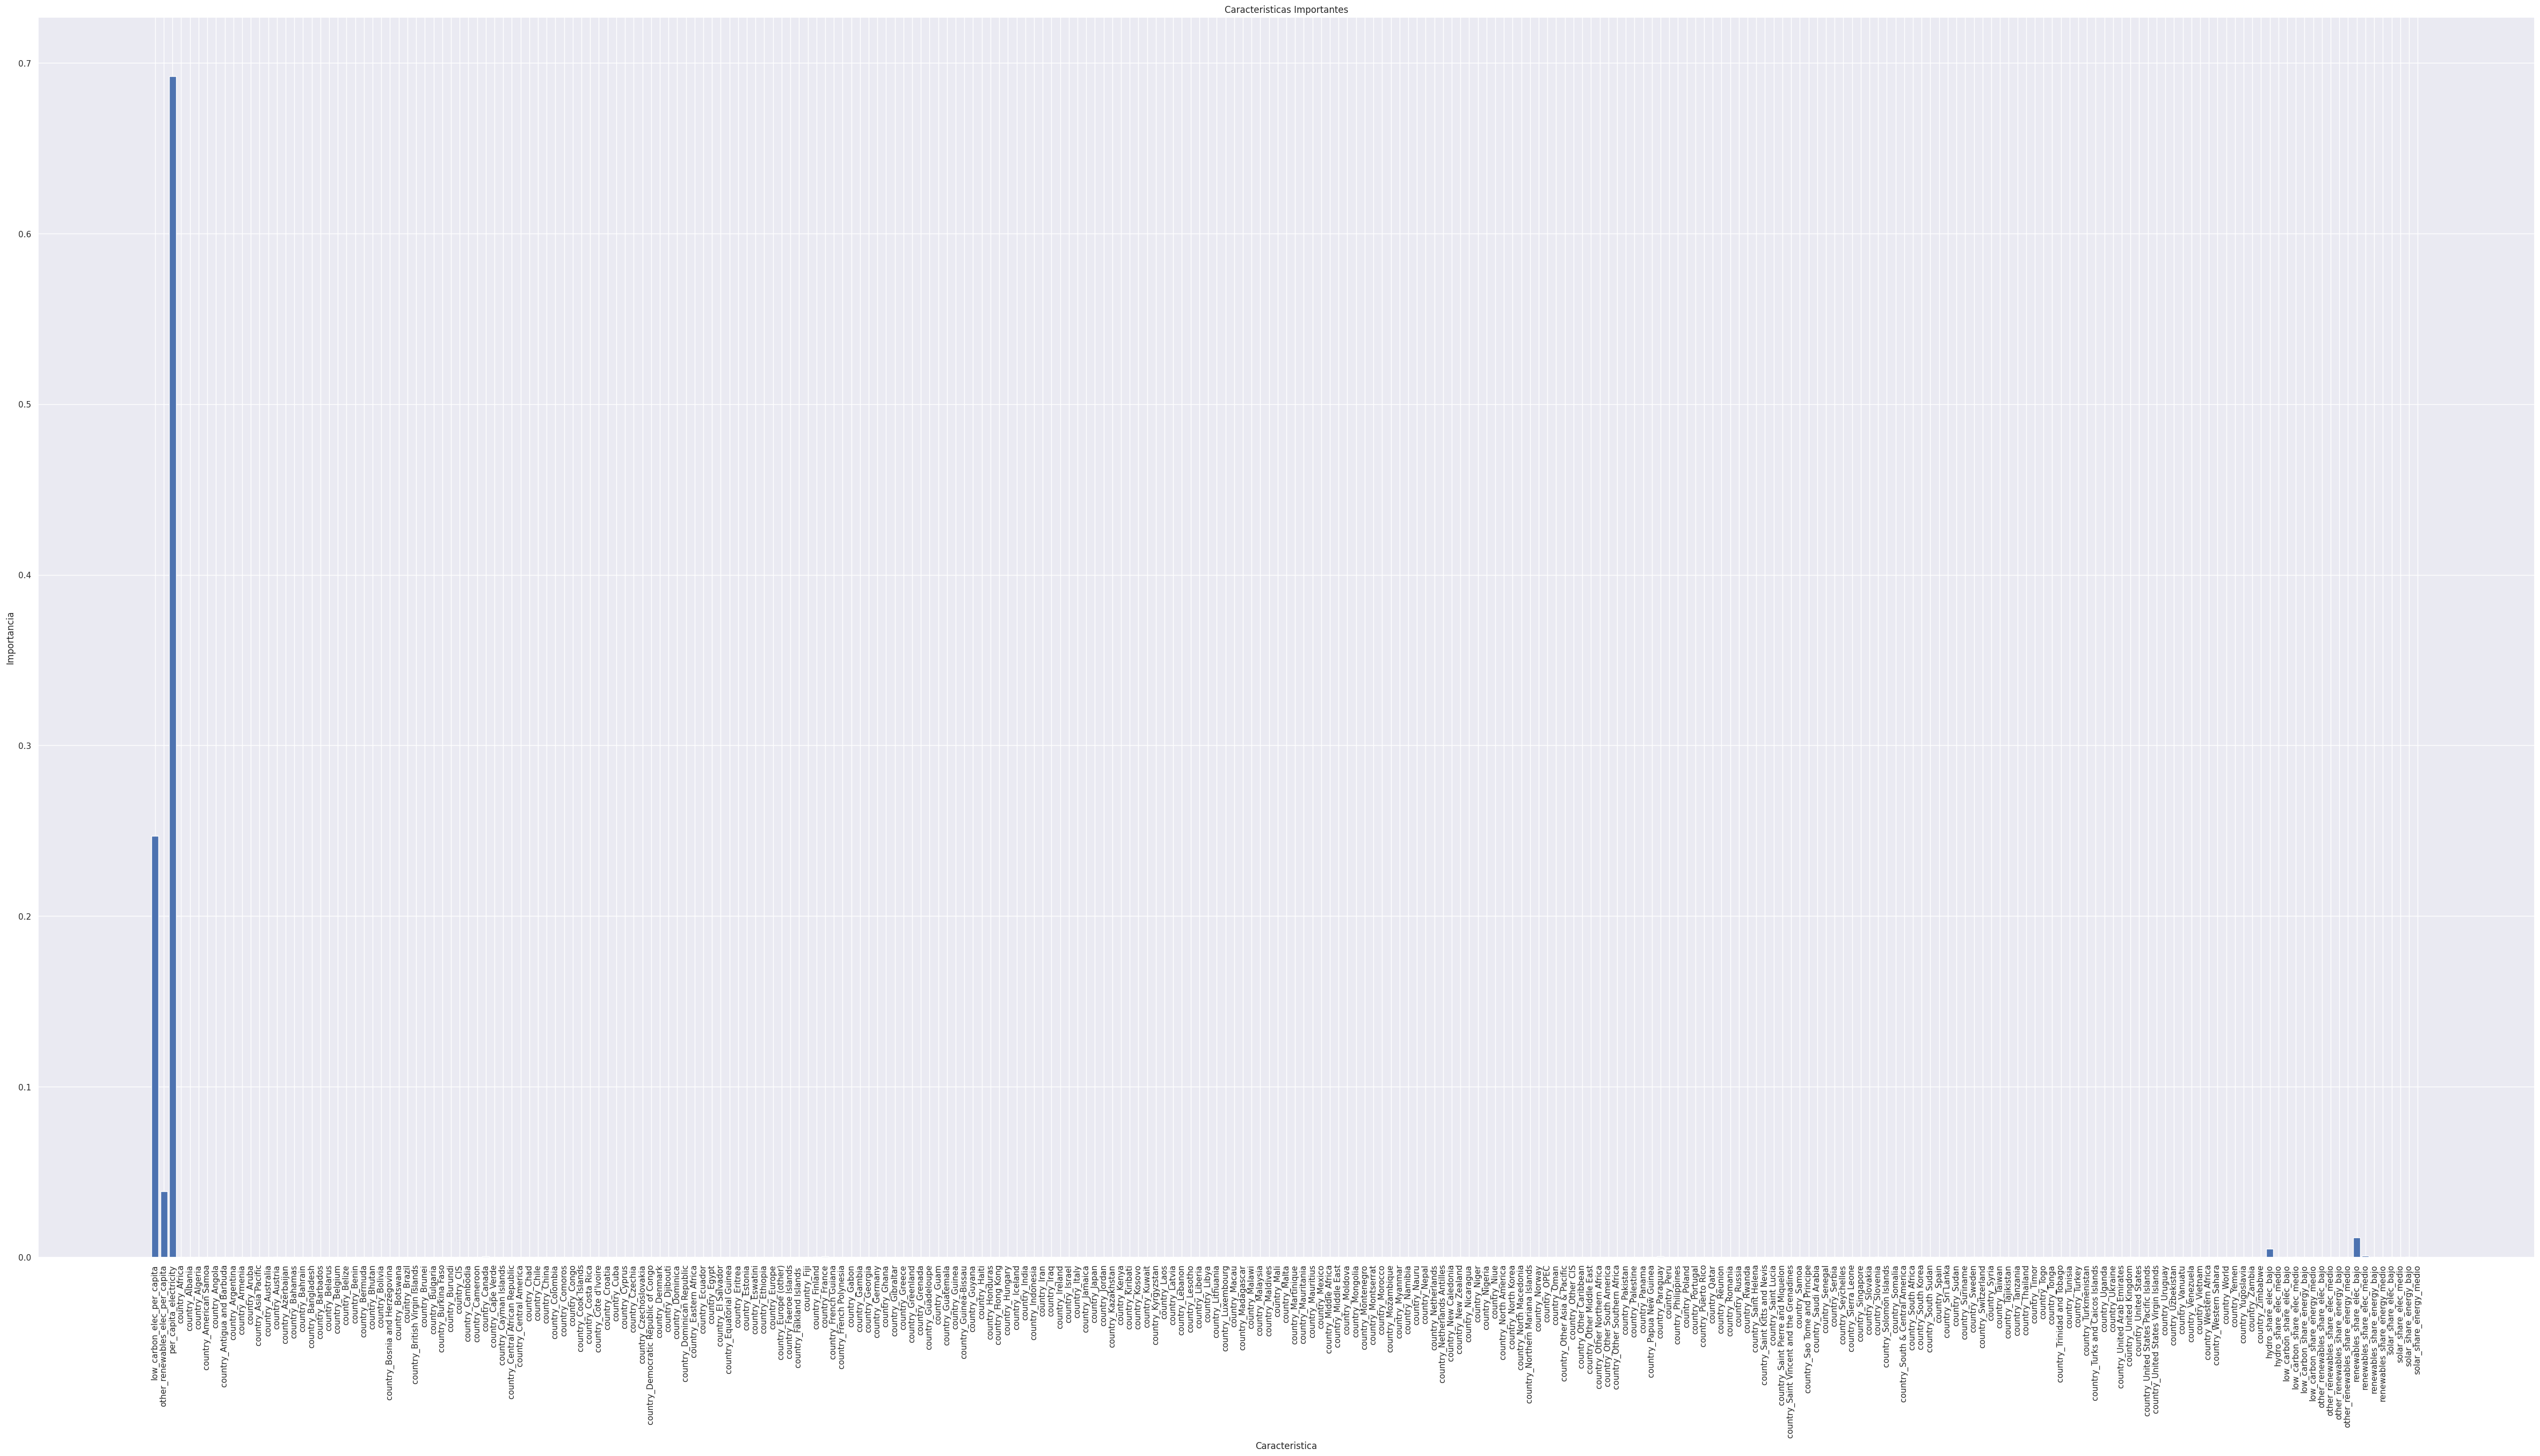

In [ ]:
feature_importances = estimadorSeleccionado.fit(X,y).feature_importances_

# Cree un marco de datos para mostrar las características importantes
feature_importance_df = pd.DataFrame({'Caracteristica': X.columns, 'Importancia': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Display the top features
print(feature_importance_df.head(20))

# Plotting the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 30))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), X.columns, rotation='vertical')
plt.xlabel('Caracteristica')
plt.ylabel('Importancia')
plt.title('Caracteristicas Importantes')
plt.show()

In [ ]:
# Filter columns that start with "dist_from_"
dist_columns = sorted({col for col in ddf_train.columns if col.startswith('dist_from_')})

# Filter columns that start with "propertyType_"
property_type_columns = sorted({col for col in ddf_train.columns if col.startswith('propertyType_')})

# Take the top 10 features based on importance
top_features = feature_importance_df.head(10)['Caracteristica'].tolist()

# Combine all lists of unique columns
selected_columns = sorted(set(dist_columns + property_type_columns + top_features+ ['renewables_elec_per_capita']))

# Create a new DataFrame with the selected columns
new_df = ddf_train_copy[selected_columns]


# Print the new DataFrame
print(new_df.columns)
print(new_df.head(10))
print(new_df.shape)

Index(['country_Canada', 'country_France', 'country_New Zealand',
       'country_Paraguay', 'hydro_share_elec_bajo',
       'low_carbon_elec_per_capita', 'other_renewables_elec_per_capita',
       'per_capita_electricity', 'renewables_elec_per_capita',
       'renewables_share_elec_bajo', 'renewables_share_elec_medio'],
      dtype='object')
       country_Canada  country_France  country_New Zealand  country_Paraguay  \
356                 0               0                    0                 0   
15009               0               0                    0                 0   
11367               0               0                    0                 0   
4847                0               0                    0                 0   
12074               0               0                    0                 0   
630                 0               0                    0                 0   
13575               0               0                    0                 0   
10807          

### Tercera Iteración: Selección de Modelo

In [ ]:
X_new = new_df.drop(columns = ['renewables_elec_per_capita']).copy()
y_new = new_df['renewables_elec_per_capita']
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, train_size = train)
print(X_test.shape,X_train.shape, X_new.shape)

(1066, 10) (3196, 10) (4262, 10)


#### Modelos entrenados con características importantes.

In [ ]:
zscores = []
estimators = [estimador1,estimador2,DecisionTreeRegressor(max_depth=20),RandomForestRegressor(max_depth=20)]
for estimator in estimators:
    print("______________________________________")
    z = cross_validate(estimator, X_new, y_new, return_train_score=True, return_estimator=False,
                       scoring=calculate_mae, cv=ShuffleSplit(n_splits=10, test_size=test))
    report_cv_score(z)
    zscores.append(np.mean(z["test_score"]))
best = np.argmin(zscores)
print ("seleccionado: ", best)
best_estimator2 = estimators[best]
print ("\nModelo Seleccionado")
print (best_estimator2)
estimadorSeleccionado2=best_estimator2

______________________________________
test score   68.486 (±7.7656) with 10 splits
train score  32.446 (±3.1113) with 10 splits
______________________________________
test score   964.344 (±41.8679) with 10 splits
train score  983.984 (±15.6935) with 10 splits
______________________________________
test score   54.976 (±8.5948) with 10 splits
train score  0.123 (±0.1475) with 10 splits
______________________________________
test score   54.196 (±4.1426) with 10 splits
train score  19.237 (±0.4225) with 10 splits
seleccionado:  3

Modelo Seleccionado
RandomForestRegressor(max_depth=20)


###Cuarta Iteración: Modelos entrenados con todos los datos

In [ ]:
zscores = []
estimators = [estimador1,estimador2, DecisionTreeRegressor(max_depth=20),RandomForestRegressor(max_depth=20)]
for estimator in estimators:
    print("________________________________________________________________")
    z = cross_validate(estimator, X, y, return_train_score=True, return_estimator=False,
                       scoring=calculate_mae, cv=ShuffleSplit(n_splits=10, test_size=test))
    report_cv_score(z)
    zscores.append(np.mean(z["test_score"]))
best = np.argmin(zscores)
print ("Seleccionado ", best)
best_estimator3 = estimators[best]
print ("Modelo Seleccionado")
print (best_estimator3)
estimadorSeleccionado3=best_estimator3

________________________________________________________________
test score   64.534 (±7.4480) with 10 splits
train score  32.940 (±3.1984) with 10 splits
________________________________________________________________
test score   958.324 (±71.2446) with 10 splits
train score  989.435 (±25.4456) with 10 splits
________________________________________________________________
test score   40.949 (±8.4083) with 10 splits
train score  0.639 (±0.5722) with 10 splits
________________________________________________________________
test score   37.425 (±3.9352) with 10 splits
train score  13.421 (±0.4364) with 10 splits
Seleccionado  3
Modelo Seleccionado
RandomForestRegressor(max_depth=20)


### Evaluando el rendimiento del modelo

In [ ]:
# Create a new DataFrame with the selected columns and the totally new data
final_df = ddf_holdout[selected_columns]


# Print the new DataFrame
print(final_df.columns)
print(final_df.head(10))
print(final_df.shape)

Index(['country_Canada', 'country_France', 'country_New Zealand',
       'country_Paraguay', 'hydro_share_elec_bajo',
       'low_carbon_elec_per_capita', 'other_renewables_elec_per_capita',
       'per_capita_electricity', 'renewables_elec_per_capita',
       'renewables_share_elec_bajo', 'renewables_share_elec_medio'],
      dtype='object')
       country_Canada  country_France  country_New Zealand  country_Paraguay  \
15544               0               0                    0                 0   
16406               0               0                    0                 0   
12402               0               0                    0                 0   
11147               0               0                    0                 0   
1962                0               0                    0                 0   
13858               0               0                    0                 0   
1839                0               0                    0                 0   
13659          

In [ ]:
X_newData = final_df.drop(columns = ['renewables_elec_per_capita']).copy()
y_newData  = final_df['renewables_elec_per_capita']

print(X_newData.shape,y_newData.shape)

(1066, 10) (1066,)


In [ ]:
best_estimator2.fit(X_new,y_new)
reported_performance = calculate_mae(best_estimator2, X_newData, y_newData)
print("Rendimiento informado del modelo seleccionado. %.3f"%reported_performance)

Rendimiento informado del modelo seleccionado. 40.182


In [ ]:
# Make predictions on the test set
y_test_preds = best_estimator2.predict(X_newData)

finaldf= pd.DataFrame({'Actual': y_newData, 'Predicho': y_test_preds})
finaldf.sample(100).round(2)

,Actual,Predicho
2719,1123.86,1123.87
9941,0.00,0.00
15488,0.00,0.00
8288,668.50,669.56
8364,6.67,6.66
...,...,...
16056,247.11,279.45
4685,231.59,230.62
5273,90.72,90.43
1240,8.98,8.97


In [ ]:
def rel_mrae(estimator, X, y):
    preds = estimator.predict(X)
    return np.mean(np.abs(preds-y)/y)

In [ ]:
print(rel_mrae(best_estimator2,X_newData,y_newData))

0.10922745770451404
